[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal-7/Challenge_LLM_for_Insurance_Claim_Automation/blob/main/code/Mdl2_pretrained_bert_embeddings_XGB.ipynb)

## Import Modules

In [1]:
import pandas as pd
import torch
import torch.nn as nn
!pip install transformers
import transformers
from transformers import BertModel
from transformers import AutoTokenizer
from torch.utils.data import Dataset
# from transformers import AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
print(transformers.__version__)
!pip install evaluate
import evaluate
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModel
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import time
import torch
import random
import matplotlib.pyplot as plt
import seaborn as sns

4.15.0


2023-07-06 16:20:22.890137: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/nitesh/env/dev38/python38/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Utility Function

In [2]:
def export_classification_report(report, mod, exec_time, eval_set=None):
    lines = report.split('\n')
    data = lines[2:4] + lines[5:9]
    data = [line.split() for line in data]
    

    acc = float(data[3][1])
    m_prec = float(data[4][2])
    m_recall = float(data[4][3])
    m_f1 = float(data[4][4])
    w_prec = float(data[5][2])
    w_recall = float(data[5][3])
    w_f1 = float(data[5][4])
    
    df = pd.DataFrame({
        'Model': [mod],
        'EvalSet': [eval_set],
        'Accuracy': [acc],
        'M-Precision': [m_prec],
        'M-Recall': [m_recall],
        'M-F1-Score': [m_f1],
        'W-Precision': [w_prec],
        'W-Recall': [w_recall],
        'W-F1-Score': [w_f1],
        'Runtime': [exec_time]
    })
    
    return df

## Import insurance claims csv file

In [ ]:
%pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
import warnings
warnings.filterwarnings("ignore")
# Load digit-recognizer (Train Data)
url = 'https://drive.google.com/uc?id=1Vc02g2yJ2GnKv0siLIVpvq9eGKeDcPgi'
output = 'insurance_claims.csv'
gdown.download(url, output, quiet=False, verify=False)

## Data Loading

Claim Categories: ['property' 'auto' 'health']
Training dataset size: 24000
Test dataset size: 6000


/tmp/ipykernel_20560/4269203072.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["encoded_label"] = labelencoder.fit_transform(train['label'])
/tmp/ipykernel_20560/4269203072.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["encoded_label"] = labelencoder.transform(test['label'])
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weigh

GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU


/tmp/ipykernel_20560/4269203072.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}
/tmp/ipykernel_20560/4269203072.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}


train embd shape: torch.Size([24000, 768]) test embd shape: torch.Size([6000, 768])
train data shape:  torch.Size([19200, 768]) validation data shape:  torch.Size([4800, 768])
[0]	validation_0-merror:0.04333	validation_1-merror:0.05042
[1]	validation_0-merror:0.04333	validation_1-merror:0.05042
[2]	validation_0-merror:0.04338	validation_1-merror:0.05083
[3]	validation_0-merror:0.04302	validation_1-merror:0.05083
[4]	validation_0-merror:0.04281	validation_1-merror:0.05042
[5]	validation_0-merror:0.04302	validation_1-merror:0.05000
[6]	validation_0-merror:0.04359	validation_1-merror:0.04896
[7]	validation_0-merror:0.04338	validation_1-merror:0.04917
[8]	validation_0-merror:0.04292	validation_1-merror:0.04938
[9]	validation_0-merror:0.04287	validation_1-merror:0.04958
[10]	validation_0-merror:0.04287	validation_1-merror:0.04958
[11]	validation_0-merror:0.04281	validation_1-merror:0.04979
[12]	validation_0-merror:0.04287	validation_1-merror:0.04979
[13]	validation_0-merror:0.04276	validati

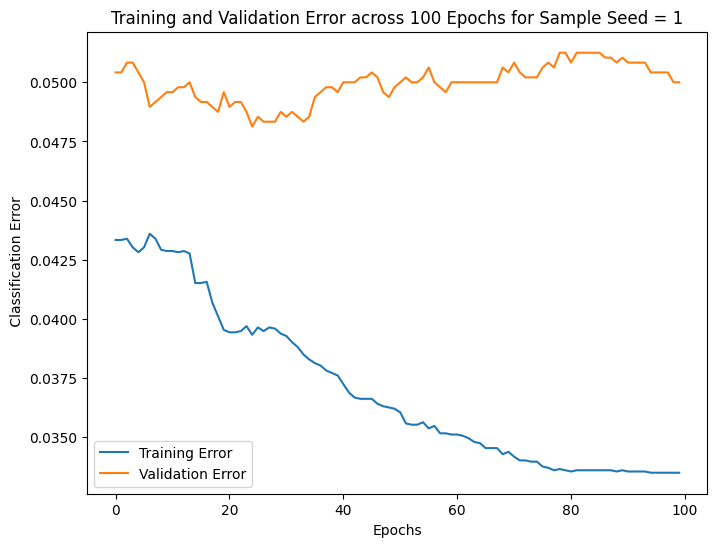

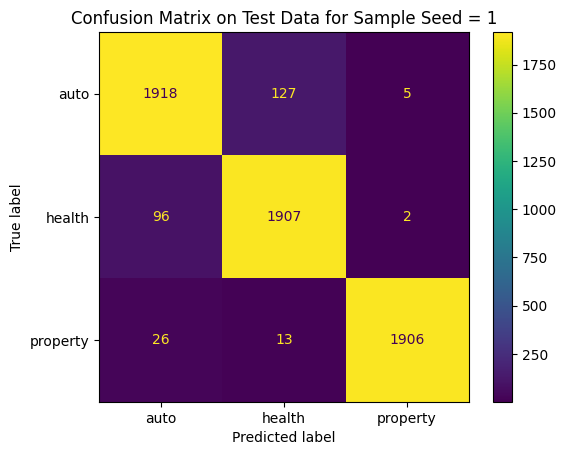

Training dataset size: 24000
Test dataset size: 6000


/tmp/ipykernel_20560/4269203072.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["encoded_label"] = labelencoder.fit_transform(train['label'])
/tmp/ipykernel_20560/4269203072.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["encoded_label"] = labelencoder.transform(test['label'])
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weigh

GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU


/tmp/ipykernel_20560/4269203072.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}


train embd shape: torch.Size([24000, 768]) test embd shape: torch.Size([6000, 768])
train data shape:  torch.Size([19200, 768]) validation data shape:  torch.Size([4800, 768])
[0]	validation_0-merror:0.04245	validation_1-merror:0.04729
[1]	validation_0-merror:0.04740	validation_1-merror:0.05250
[2]	validation_0-merror:0.04740	validation_1-merror:0.05250
[3]	validation_0-merror:0.04740	validation_1-merror:0.05250
[4]	validation_0-merror:0.04521	validation_1-merror:0.05104
[5]	validation_0-merror:0.04589	validation_1-merror:0.05208
[6]	validation_0-merror:0.04562	validation_1-merror:0.05208
[7]	validation_0-merror:0.04224	validation_1-merror:0.04833
[8]	validation_0-merror:0.04224	validation_1-merror:0.04833
[9]	validation_0-merror:0.04224	validation_1-merror:0.04833
[10]	validation_0-merror:0.04083	validation_1-merror:0.04667
[11]	validation_0-merror:0.04078	validation_1-merror:0.04667
[12]	validation_0-merror:0.04063	validation_1-merror:0.04688
[13]	validation_0-merror:0.04042	validati

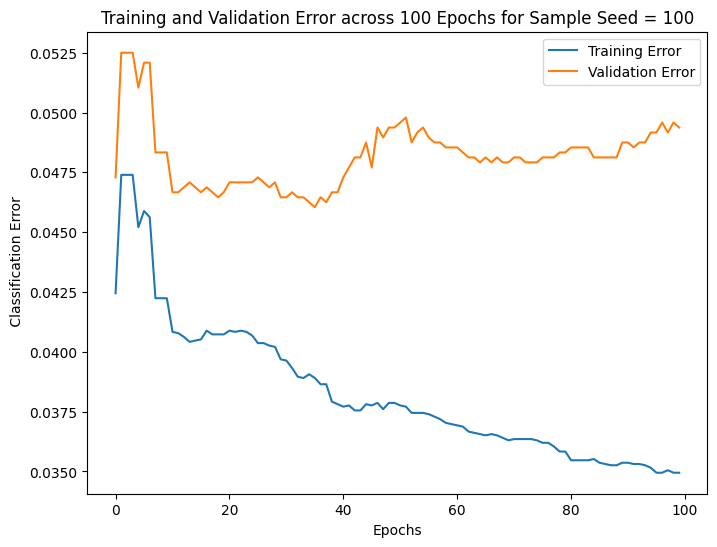

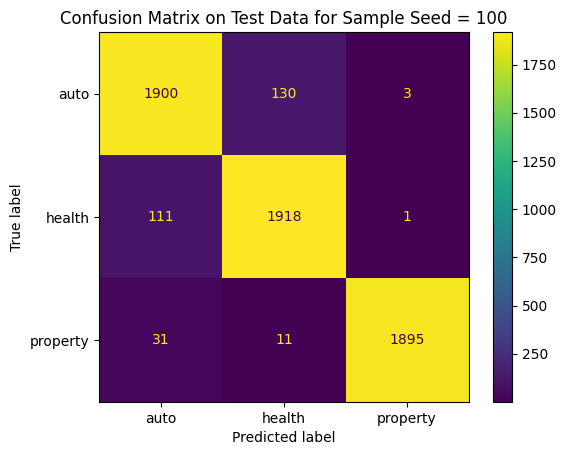

Training dataset size: 24000
Test dataset size: 6000


/tmp/ipykernel_20560/4269203072.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["encoded_label"] = labelencoder.fit_transform(train['label'])
/tmp/ipykernel_20560/4269203072.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["encoded_label"] = labelencoder.transform(test['label'])
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weigh

GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU


/tmp/ipykernel_20560/4269203072.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}


train embd shape: torch.Size([24000, 768]) test embd shape: torch.Size([6000, 768])
train data shape:  torch.Size([19200, 768]) validation data shape:  torch.Size([4800, 768])
[0]	validation_0-merror:0.04349	validation_1-merror:0.05083
[1]	validation_0-merror:0.04354	validation_1-merror:0.05042
[2]	validation_0-merror:0.04229	validation_1-merror:0.04938
[3]	validation_0-merror:0.04198	validation_1-merror:0.04833
[4]	validation_0-merror:0.04193	validation_1-merror:0.04833
[5]	validation_0-merror:0.04193	validation_1-merror:0.04833
[6]	validation_0-merror:0.04193	validation_1-merror:0.04833
[7]	validation_0-merror:0.04193	validation_1-merror:0.04833
[8]	validation_0-merror:0.04193	validation_1-merror:0.04833
[9]	validation_0-merror:0.04146	validation_1-merror:0.04854
[10]	validation_0-merror:0.04031	validation_1-merror:0.04729
[11]	validation_0-merror:0.04026	validation_1-merror:0.04750
[12]	validation_0-merror:0.04088	validation_1-merror:0.04833
[13]	validation_0-merror:0.04052	validati

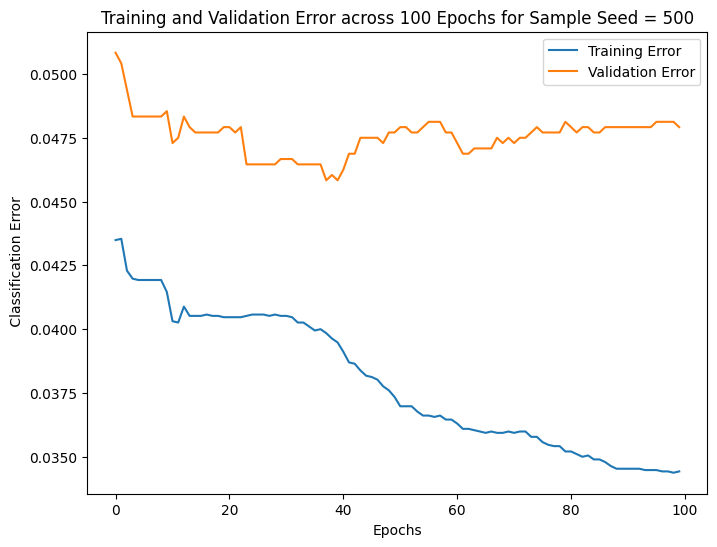

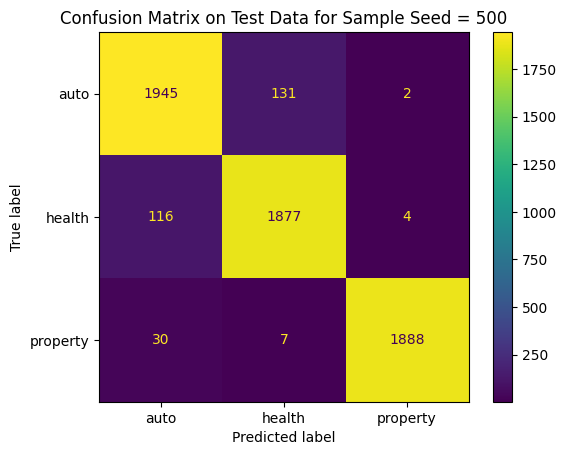

Training dataset size: 24000
Test dataset size: 6000


/tmp/ipykernel_20560/4269203072.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["encoded_label"] = labelencoder.fit_transform(train['label'])
/tmp/ipykernel_20560/4269203072.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["encoded_label"] = labelencoder.transform(test['label'])
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weigh

GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU


/tmp/ipykernel_20560/4269203072.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}


train embd shape: torch.Size([24000, 768]) test embd shape: torch.Size([6000, 768])
train data shape:  torch.Size([19200, 768]) validation data shape:  torch.Size([4800, 768])
[0]	validation_0-merror:0.04188	validation_1-merror:0.04104
[1]	validation_0-merror:0.04307	validation_1-merror:0.04042
[2]	validation_0-merror:0.04297	validation_1-merror:0.04042
[3]	validation_0-merror:0.04281	validation_1-merror:0.04042
[4]	validation_0-merror:0.04219	validation_1-merror:0.03938
[5]	validation_0-merror:0.04198	validation_1-merror:0.03938
[6]	validation_0-merror:0.04193	validation_1-merror:0.03979
[7]	validation_0-merror:0.04151	validation_1-merror:0.03917
[8]	validation_0-merror:0.04156	validation_1-merror:0.03917
[9]	validation_0-merror:0.04172	validation_1-merror:0.03896
[10]	validation_0-merror:0.04172	validation_1-merror:0.03896
[11]	validation_0-merror:0.04167	validation_1-merror:0.03917
[12]	validation_0-merror:0.04161	validation_1-merror:0.03917
[13]	validation_0-merror:0.04161	validati

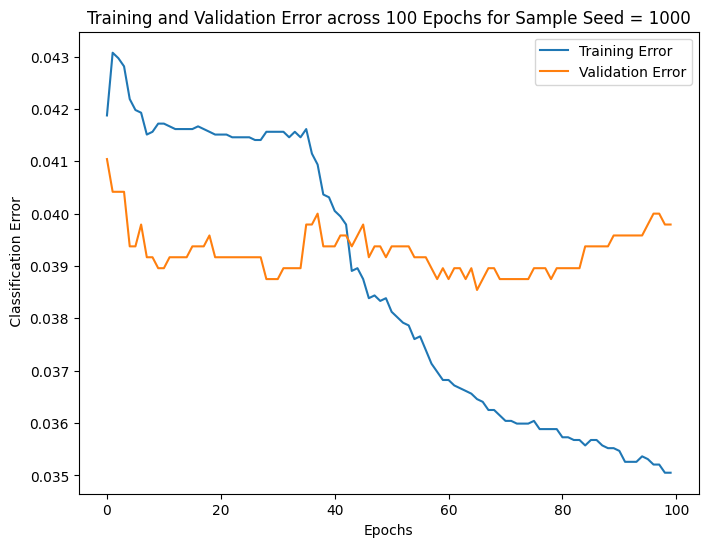

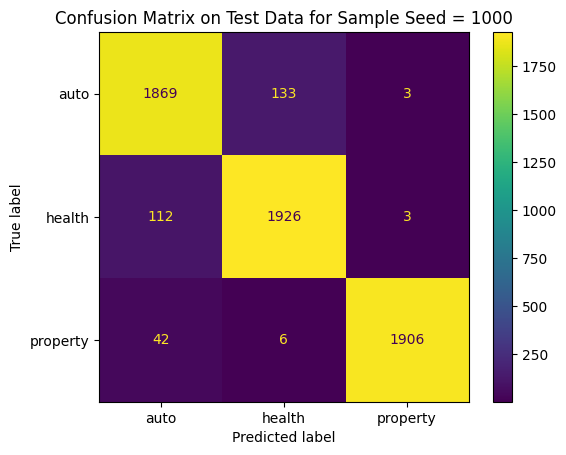

Training dataset size: 24000
Test dataset size: 6000


/tmp/ipykernel_20560/4269203072.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["encoded_label"] = labelencoder.fit_transform(train['label'])
/tmp/ipykernel_20560/4269203072.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["encoded_label"] = labelencoder.transform(test['label'])
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weigh

GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU


/tmp/ipykernel_20560/4269203072.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}


train embd shape: torch.Size([24000, 768]) test embd shape: torch.Size([6000, 768])
train data shape:  torch.Size([19200, 768]) validation data shape:  torch.Size([4800, 768])
[0]	validation_0-merror:0.04052	validation_1-merror:0.04688
[1]	validation_0-merror:0.04068	validation_1-merror:0.04771
[2]	validation_0-merror:0.04068	validation_1-merror:0.04771
[3]	validation_0-merror:0.04073	validation_1-merror:0.04771
[4]	validation_0-merror:0.04073	validation_1-merror:0.04771
[5]	validation_0-merror:0.04047	validation_1-merror:0.04771
[6]	validation_0-merror:0.04047	validation_1-merror:0.04792
[7]	validation_0-merror:0.04042	validation_1-merror:0.04792
[8]	validation_0-merror:0.04047	validation_1-merror:0.04792
[9]	validation_0-merror:0.04036	validation_1-merror:0.04771
[10]	validation_0-merror:0.04036	validation_1-merror:0.04771
[11]	validation_0-merror:0.04036	validation_1-merror:0.04750
[12]	validation_0-merror:0.04021	validation_1-merror:0.04771
[13]	validation_0-merror:0.04021	validati

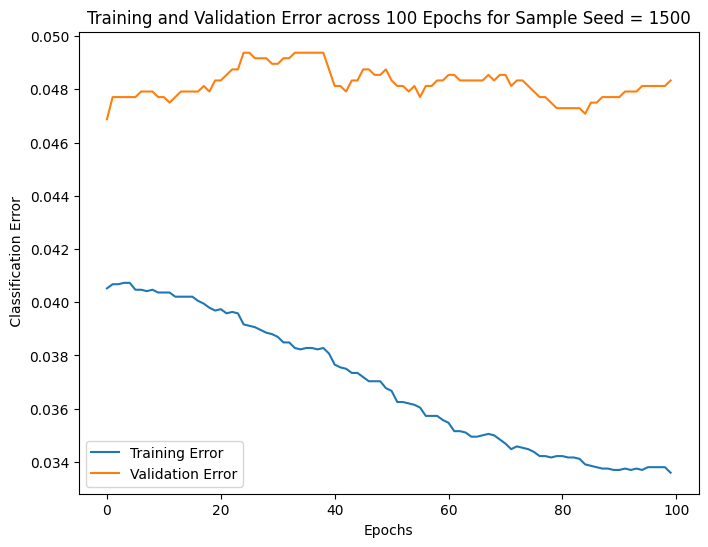

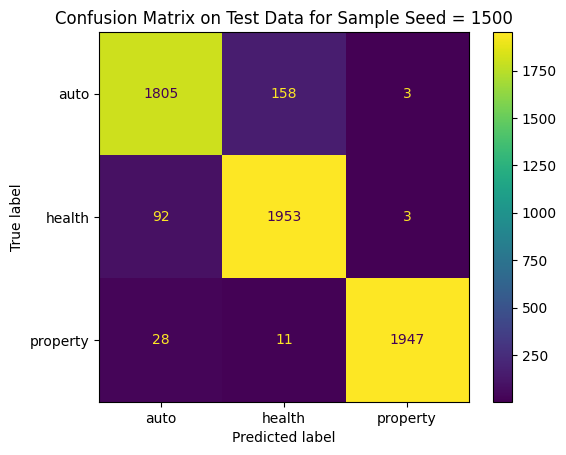

In [3]:
# df = pd.read_csv('insurance_synthetic_data.csv')
df  = pd.read_csv('insurance_claims.csv')
# df  = pd.read_csv('../dataset/insurance_claims_data/insurance_claims.csv')
df = df.rename(columns = {'incident_class':'label'})
df = df.rename(columns = {'incident_description':'text'})
# display(df)
print("Claim Categories:", df.label.unique())


PERFORMANCE_RESULTS = pd.DataFrame(columns=['Model', 'EvalSet', 'Accuracy', 
                       'M-Precision', 'M-Recall', 
                       'M-F1-Score', 'W-Precision',
                       'W-Recall', 'W-F1-Score', 'Runtime'])



for KK in list([1,100, 500, 1000, 1500]):
    
    ##################################################
    ## Data Preprocessing
    ##################################################
    
    start_time = time.time()
    random.seed(KK)
    np.random.seed(KK)
    torch.manual_seed(KK)
    
    # Divide the data into train, validation, and test sets
    train, test = train_test_split(df, test_size=0.2, random_state=KK)
    # val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

    # Print the sizes of the datasets
    print("Training dataset size:", len(train))
    print("Test dataset size:", len(test))


    labelencoder = LabelEncoder()
    labelencoder.fit(train['label'])
    train["encoded_label"] = labelencoder.fit_transform(train['label'])
    test["encoded_label"] = labelencoder.transform(test['label'])
#     print("Training data Examples: ")
#     display(train)
#     print("Test data Examples: ")
#     display(test)


    # Convert your train and test text data to lists
    train_texts = train["text"].tolist()
    test_texts = test["text"].tolist()

    # Initialize the tokenizer
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

    train_encodings = tokenizer(
        train_texts,
        padding=True,
        max_length=12,
        return_tensors="pt",
        truncation=True
    )

    test_encodings = tokenizer(
        test_texts,
        padding=True,
        max_length=12,
        return_tensors="pt",
        truncation=True
    )

    
    
    ##################################################
    ## Generate Embeddings using Pretrained BERT Model 
    ##################################################
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = BertModel.from_pretrained('bert-base-uncased')
    model = model.to(device)



    batch_size = 16
    train_embeddings = []
    test_embeddings = []

    # Get the GPU device on which we run our experiments
    gpu_name = torch.cuda.get_device_name(device) if device.type == 'cuda' else 'N/A'
    print("GPU Device:", gpu_name)



    with torch.no_grad():
        for i in range(0, len(train_encodings['input_ids']), batch_size):
            batch_tokens = {key: val[i:i+batch_size] for key, val in train_encodings.items()}
            batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}
            batch_outputs = model(**batch_tokens)
            batch_embeddings = batch_outputs.last_hidden_state[:, 0, :].to('cpu')  # Move back to CPU temporarily
            train_embeddings.append(batch_embeddings.to(device))  # Move to CUDA device

        for i in range(0, len(test_encodings['input_ids']), batch_size):
            batch_tokens = {key: val[i:i+batch_size] for key, val in test_encodings.items()}
            batch_tokens = {key: torch.tensor(val).to(device) for key, val in batch_tokens.items()}
            batch_outputs = model(**batch_tokens)
            batch_embeddings = batch_outputs.last_hidden_state[:, 0, :].to('cpu')  # Move back to CPU temporarily
            test_embeddings.append(batch_embeddings.to(device))  # Move to CUDA device

    train_embeddings = torch.cat(train_embeddings, dim=0).to('cpu')  # Move back to CPU
    test_embeddings = torch.cat(test_embeddings, dim=0).to('cpu')  # Move back to CPU
    print('train embd shape:', train_embeddings.shape, 'test embd shape:', test_embeddings.shape)



    train_labels=train.encoded_label.to_list()

    # Split the data into train and validation sets
    train_embeddings1, val_embeddings1, train_labels1, val_labels1 = train_test_split(train_embeddings, 
                                                                                      train_labels, 
                                                                                      test_size=0.2, 
                                                                                      random_state=KK)
    print("train data shape: ", train_embeddings1.shape, "validation data shape: ", val_embeddings1.shape)


    # Convert the encoded labels to NumPy arrays
    train_labels = train['encoded_label'].values
    test_labels = test['encoded_label'].values

    # Convert Torch tensors to NumPy arrays
    train_embeddings1_np = train_embeddings1.detach().cpu().numpy()
    val_embeddings1_np = val_embeddings1.detach().cpu().numpy()
    train_labels1_np = train_labels1
    val_labels1_np = val_labels1
    
    
        
    ################################################
    ## XGBoost Classifier 
    ################################################

    # Initialize the XGBoost Classifier
    epchs=100
    xgb_classifier = xgb.XGBClassifier(n_estimators=epchs, learning_rate=0.02)
    eval_set = (
        (train_embeddings1_np, train_labels1_np),
        (val_embeddings1_np, val_labels1_np)
    )
    xgb_classifier.fit(
        train_embeddings1_np,
        train_labels1_np,
        eval_metric="merror",
        eval_set=eval_set
    )

    end_time = time.time()
    execution_time1 = end_time - start_time

    print(f"Execution time: {execution_time1} seconds")
    


    
    ################################################
    ## Training and Validation Error Plots 
    ################################################
    
    # Fetch the evaluation results for training and validation error plots
    eval_results = xgb_classifier.evals_result()

    # Read the merror values
    train_merror = eval_results['validation_0']['merror']
    val_merror = eval_results['validation_1']['merror']

    # Plot the merror values
    plt.figure(figsize=(8, 6))
    plt.plot(train_merror, label='Training Error')
    plt.plot(val_merror, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel(' Classification Error')
    plt.title(f'Training and Validation Error across {epchs} Epochs for Sample Seed = {KK}')
    plt.legend()
#     plt.savefig(f'../result_xls/' +
#     f'training_val_error_plots/ErrorPlot_Sample_Seed={KK}.png', 
#     dpi=300, 
#     bbox_inches='tight')
    plt.show()



    
    ###################################################
    ## Prediction on Training, Validation and Test Data
    ###################################################
    
    modname = 'Pretrained_BERTEmbd_with_XGB'

    # Make predictions on the training set
    train_preds = xgb_classifier.predict(train_embeddings1_np)

    # Print the classification report and confusion matrix for train data
    eval_set = "training"
    train_classification_rep= classification_report(train_labels1_np, train_preds, digits=3)
    results_train= export_classification_report(train_classification_rep, modname, execution_time1, eval_set)
    PERFORMANCE_RESULTS = pd.concat([PERFORMANCE_RESULTS, results_train])



    # Make predictions on the validation set
    val_preds = xgb_classifier.predict(val_embeddings1_np)
    eval_set = "validation"
    val_classification_rep=classification_report(val_labels1_np, val_preds, digits=3)
    results_val= export_classification_report(val_classification_rep, modname, execution_time1, eval_set)
    PERFORMANCE_RESULTS = pd.concat([PERFORMANCE_RESULTS, results_val])


    # Make predictions on the test set
    test_embeddings_np = test_embeddings.detach().cpu().numpy()
    test_preds = xgb_classifier.predict(test_embeddings_np)
    eval_set = "test"
    test_classification_rep=classification_report(test_labels, test_preds, digits=3)
    results_test= export_classification_report(test_classification_rep, modname, execution_time1, eval_set)
    PERFORMANCE_RESULTS = pd.concat([PERFORMANCE_RESULTS, results_test])
#     confusion_matrix = plot_confusion_matrix(xgb_classifier, test_embeddings_np, test_labels)
    
#     test_labels_inv=labelencoder.inverse_transform(test_labels)
    confusion_matrix = plot_confusion_matrix(xgb_classifier, test_embeddings_np, 
                                                 test_labels, display_labels=['auto', 'health', 'property'])
    print(confusion_matrix)


    plt.title(f'Confusion Matrix on Test Data for Sample Seed = {KK}')

#     plt.savefig(f'../result_xls/confusion_matrix_plots/Confusion Matrix on Test Data for Sample Seed = {KK}.png', 
#                 dpi=300, 
#                 bbox_inches='tight')

    plt.show()

In [4]:
PERFORMANCE_RESULTS

,Model,EvalSet,Accuracy,M-Precision,M-Recall,M-F1-Score,W-Precision,W-Recall,W-F1-Score,Runtime
0,Pretrained_BERTEmbd_with_XGB,training,0.967,0.967,0.967,0.967,0.967,0.967,0.967,67.850544
0,Pretrained_BERTEmbd_with_XGB,validation,0.950,0.951,0.950,0.950,0.950,0.950,0.950,67.850544
0,Pretrained_BERTEmbd_with_XGB,test,0.955,0.956,0.956,0.956,0.956,0.955,0.955,67.850544
0,Pretrained_BERTEmbd_with_XGB,training,0.965,0.966,0.965,0.965,0.965,0.965,0.965,65.788029
0,Pretrained_BERTEmbd_with_XGB,validation,0.951,0.951,0.951,0.951,0.951,0.951,0.951,65.788029
0,Pretrained_BERTEmbd_with_XGB,test,0.952,0.953,0.953,0.953,0.953,0.952,0.952,65.788029
0,Pretrained_BERTEmbd_with_XGB,training,0.966,0.966,0.966,0.966,0.966,0.966,0.966,64.421141
0,Pretrained_BERTEmbd_with_XGB,validation,0.952,0.953,0.952,0.952,0.952,0.952,0.952,64.421141
0,Pretrained_BERTEmbd_with_XGB,test,0.952,0.953,0.952,0.953,0.952,0.952,0.952,64.421141
0,Pretrained_BERTEmbd_with_XGB,training,0.965,0.965,0.965,0.965,0.965,0.965,0.965,67.556792


In [5]:
# PERFORMANCE_RESULTS.to_excel(f'../result_xls/{modname}.xlsx', index=False)


In the context of XGBoost, the "merror" refers to the multi-class classification error. It represents the classification error rate for a multi-class classification problem.

When training an XGBoost classifier, you can monitor the performance of the model by evaluating the error rate on both the training set and the validation set. The "merror" metric measures the classification error on these sets, which is the proportion of misclassified samples.

By plotting the "merror" over the training iterations or epochs, you can visualize the performance of the model during training. The plot will show how the classification error changes as the model learns from the training data. It helps you understand if the model is overfitting (performing well on the training data but poorly on the validation data) or underfitting (performing poorly on both the training and validation data).

The plot of "merror" can be used to identify the optimal number of training iterations or epochs, as you typically aim to minimize the error on the validation set. It provides insights into the learning process of the model and helps in assessing its overall performance.